In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.shape

(400, 11)

In [4]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
company['ShelveLoc']=le.fit_transform(company['ShelveLoc'])
company['Urban']=le.fit_transform(company['Urban'])
company['US']=le.fit_transform(company['US'])


In [10]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [11]:
company['sales_type']=''

In [12]:
company2=company.copy()

In [13]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_type
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,


In [14]:
for i in range(len(company2['Sales'])):
    if company2['Sales'][i]>9.32:
        company2['sales_type'][i]='HIGH' 
    elif company2['Sales'][i]<5.39:
          company2['sales_type'][i]='LOW'
    else :
        company2['sales_type'][i]='MEDIUM'     
    

In [15]:
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_type
0,9.50,138,73,11,276,120,0,42,17,1,1,HIGH
1,11.22,111,48,16,260,83,1,65,10,1,1,HIGH
2,10.06,113,35,10,269,80,2,59,12,1,1,HIGH
3,7.40,117,100,4,466,97,2,55,14,1,1,MEDIUM
4,4.15,141,64,3,340,128,0,38,13,1,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,HIGH
396,6.14,139,23,3,37,120,2,55,11,0,1,MEDIUM
397,7.41,162,26,12,368,159,2,40,18,1,1,MEDIUM
398,5.94,100,79,7,284,95,0,50,12,1,1,MEDIUM


In [16]:

company2=company2.drop(['Sales'],axis=1)

In [17]:
company2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_type
0,138,73,11,276,120,0,42,17,1,1,HIGH
1,111,48,16,260,83,1,65,10,1,1,HIGH
2,113,35,10,269,80,2,59,12,1,1,HIGH
3,117,100,4,466,97,2,55,14,1,1,MEDIUM
4,141,64,3,340,128,0,38,13,1,0,LOW


In [18]:
company2['sales_type'].nunique()

3

In [19]:
x=company2.drop(['sales_type'],axis=1)
y=company2['sales_type']

In [20]:
x.shape,y.shape

((400, 10), (400,))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
r_f=RandomForestClassifier().fit(x_train,y_train)
yp_test=r_f.predict(x_test)
yp_train=r_f.predict(x_train)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [25]:
print(classification_report(y_test,yp_test))

              precision    recall  f1-score   support

        HIGH       0.75      0.33      0.46        18
         LOW       0.59      0.53      0.56        19
      MEDIUM       0.62      0.79      0.69        43

    accuracy                           0.62        80
   macro avg       0.65      0.55      0.57        80
weighted avg       0.64      0.62      0.61        80



In [26]:
accuracy_score(y_test,yp_test)

0.625

In [27]:
cm=confusion_matrix(y_test,yp_test)
cm

array([[ 6,  0, 12],
       [ 0, 10,  9],
       [ 2,  7, 34]], dtype=int64)

In [28]:
import seaborn as sns

<AxesSubplot:>

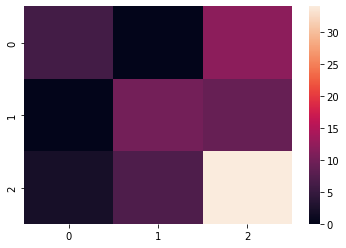

In [29]:
sns.heatmap(cm)

In [30]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator=r_f,param_grid={'criterion':['entropy','gini'],
                                                 'max_depth':[1,2,3,4,5],
                                                 'min_samples_leaf':[1,2,3,4],
                                                 'min_samples_split':[2,4,6,8],
                                                 'n_estimators':[30,60,100]})


In [31]:
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30}
0.65


In [34]:
r_f_cv=RandomForestClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 60,random_state=12)

In [35]:
r_f_cv.fit(x_train,y_train)
yp_testcv=r_f_cv.predict(x_test)
accuracy_score(y_test,yp_testcv)

0.6375

## feature importance

In [44]:
feature_r_f=x_train.columns
len(feature_r_f)

10

In [45]:
imp_feature=r_f_cv.feature_importances_
len(imp_feature)

10

In [46]:
data_rf=pd.DataFrame({'feature':feature_r_f,'imp_feature':imp_feature})
data_rf=data_rf.sort_values('imp_feature')

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

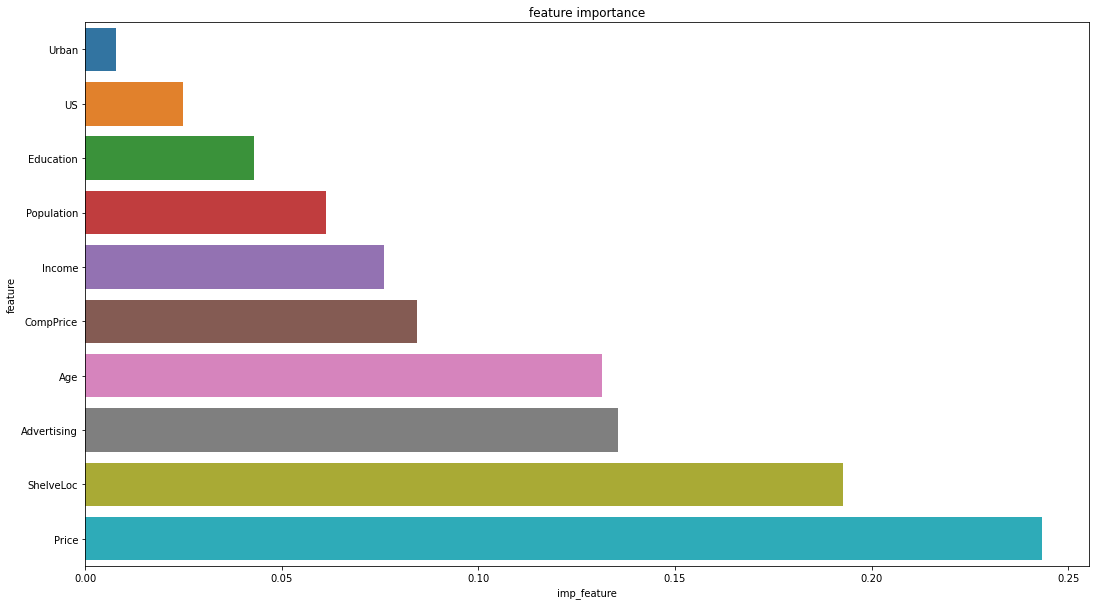

In [50]:
plt.figure(figsize=(18,10))
plt.title('feature importance')
sns.barplot(y='feature',x='imp_feature',data=data_rf)
plt.show()

The plot clearly shows that some of the features donot contribute much for model building

Hence the accuracy can be imporved by droping those insignificant features

## feature selection by selectfrom model

In [53]:
from sklearn.feature_selection import SelectFromModel

In [54]:
selector=SelectFromModel(estimator=RandomForestClassifier())
selector.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [55]:
selector.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [57]:
feature=x_train.columns[selector.get_support()]

In [58]:
len(x_train.columns[selector.get_support()])

6

Out of 10 features only 6 features is selscted for building models

In [60]:
x_trainrf=selector.transform(x_train)
x_testrf=selector.transform(x_test)

In [62]:
rf_model1=RandomForestClassifier().fit(x_trainrf,y_train)

In [63]:
yp_testrf=rf_model1.predict(x_testrf)

In [66]:
print(accuracy_score(y_test,yp_testrf))

0.65


In [67]:
confusion_matrix(y_test,yp_testrf)

array([[10,  0,  8],
       [ 0, 10,  9],
       [ 6,  5, 32]], dtype=int64)

In [68]:
print(classification_report(y_test,yp_testrf))

              precision    recall  f1-score   support

        HIGH       0.62      0.56      0.59        18
         LOW       0.67      0.53      0.59        19
      MEDIUM       0.65      0.74      0.70        43

    accuracy                           0.65        80
   macro avg       0.65      0.61      0.62        80
weighted avg       0.65      0.65      0.65        80



In [69]:
imp_feature=rf_model1.feature_importances_
imp_feature

array([0.1573179 , 0.15112386, 0.15139764, 0.2519696 , 0.13706752,
       0.15112348])

In [77]:
data_rf=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_rf=data_rf.sort_values('imp_feature')

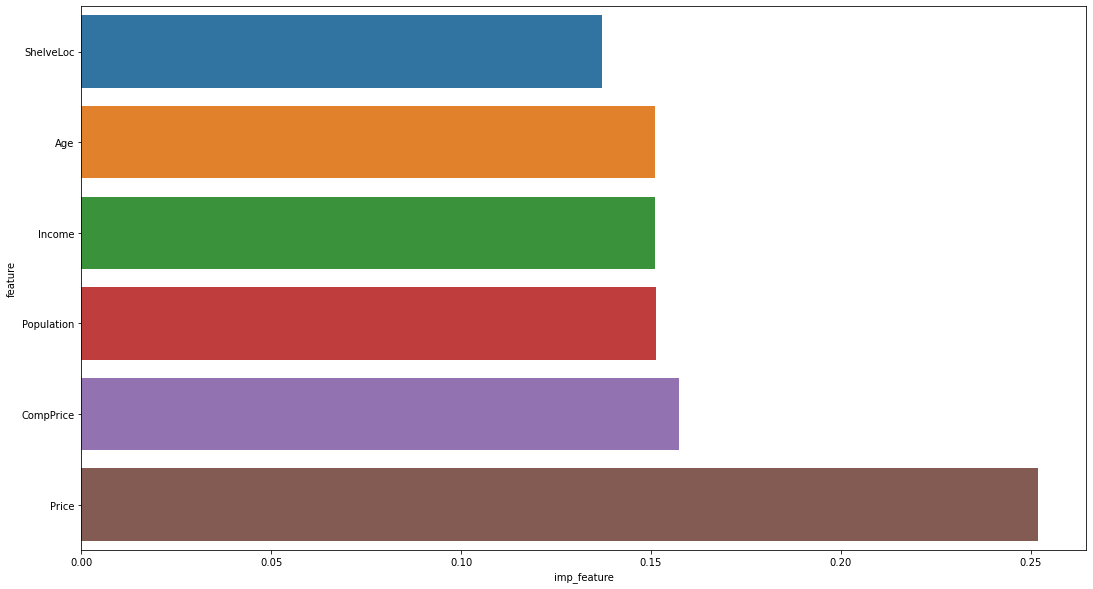

In [79]:
plt.figure(figsize=(18,10))
sns.barplot(y='feature',x='imp_feature',data=data_rf)
plt.show()

In [1]:
#Inference

#Price is the feature which affect/contibute more for the sales

#Competerior price fallows price which affect the most